In [68]:
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**FORWARD SIMULATION**

In [69]:
def forward_sim(n, T, alpha=0.9, gamma=0.1, beta=0.2, lmda=(1, 5)): 

    # Pre-defined (transition) probabilities
    Gamma = [[1-gamma, 0, gamma], [0, 1-gamma, gamma], [beta*0.5, beta*0.5, 1-beta]]
    Z_prob = [[alpha, 1-alpha], [1-alpha, alpha], [0.5, 0.5]]

    # Initialize arrays
    C = np.zeros(T, dtype=int)
    Z = np.zeros((T, n), dtype=int)
    X = np.zeros((T, n), dtype=int)

    # Initial state
    C[0] = 2

    # Initialize X and Z for t=0
    for i in range(0, n):
            Z[0, i] = random.choices([0, 1], Z_prob[C[0]])[0]
            X[0, i] = np.random.poisson(lam = lmda[Z[0, i]])

    # Simulate the proces for the remaining t=1 to t=T timesteps
    for t in range(1, T):
        C[t] = random.choices([0, 1, 2], Gamma[C[t-1]])[0]
        for i in range(0, n):
            Z[t, i] = random.choices([0, 1], Z_prob[C[t]])[0]
            X[t, i] = np.random.poisson(lam = lmda[Z[t, i]])

    return C, Z, X

In [76]:
n = 2; T = 5
C, Z, X = forward_sim(n, T)

**VISUALIZATION**

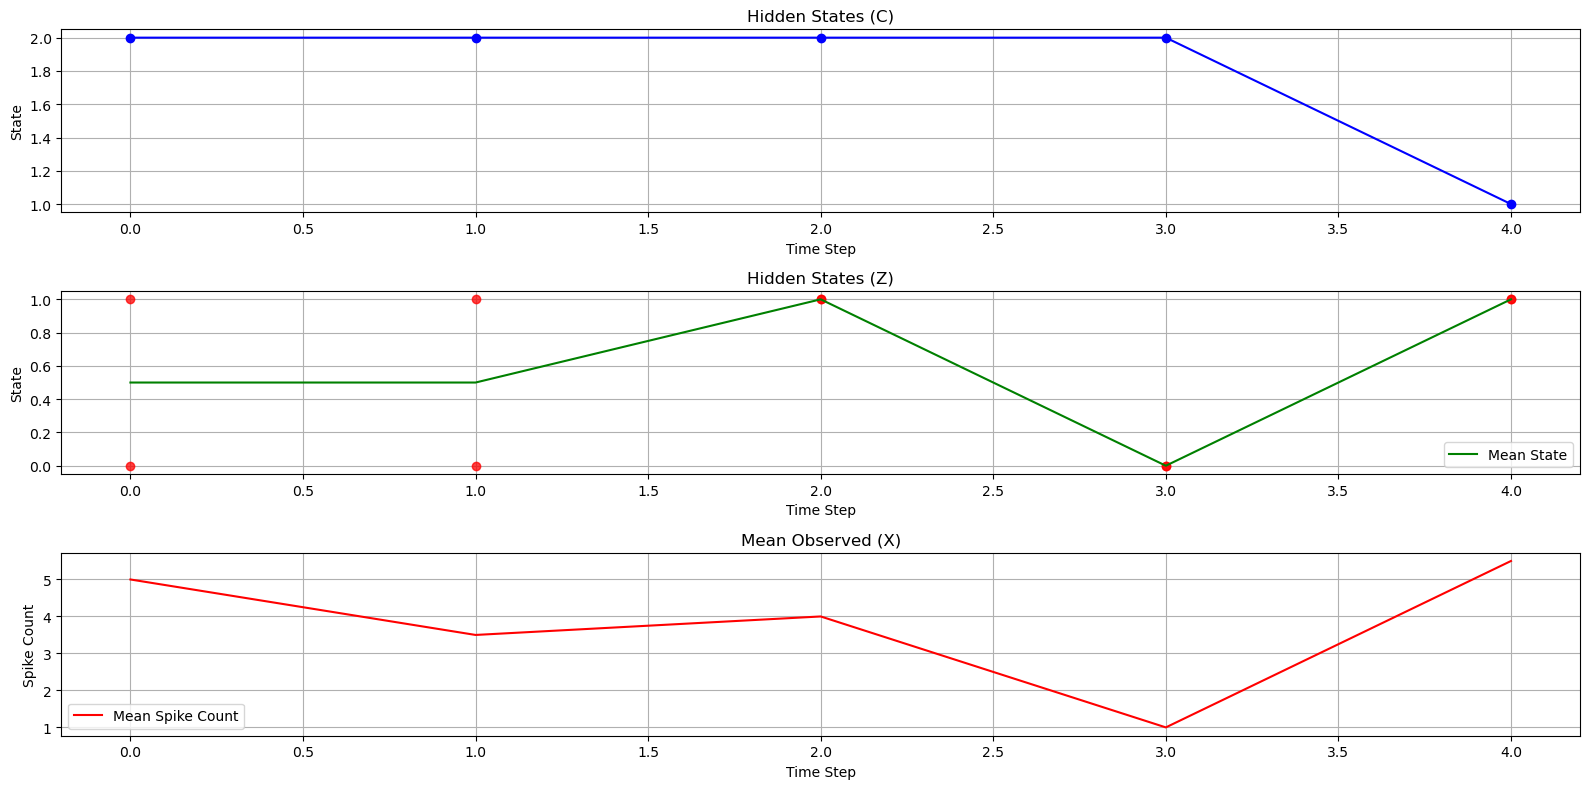

In [71]:
# Mean Z per t
avg_Z = np.mean(Z,axis=1).reshape(1,-1)[0]
avg_X = np.mean(X,axis=1).reshape(1,-1)[0]

# Visualize the data
plt.figure(figsize=(16, 8))

# Plot hidden states (C)
plt.subplot(3, 1, 1)
plt.plot(range(T), C, marker='o', color='blue')
plt.title('Hidden States (C)')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.grid(True)

# Plot observed states (Z)
plt.subplot(3, 1, 2)
for i in range(n):
    plt.plot(range(T), Z[:, i], marker='o', alpha=1.5/n, color = 'red', linewidth = 0)
plt.plot(range(T), avg_Z, color='green', label = 'Mean State')
plt.title('Hidden States (Z)')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)

# Plot observed states (X)
plt.subplot(3, 1, 3)
plt.plot(range(T), avg_X, color='red', label = 'Mean Spike Count')
plt.title('Mean Observed (X)')
plt.xlabel('Time Step')
plt.ylabel('Spike Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**MULTICLASS LOGISTIC REGRESSION**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the date for validation
X_train, X_test, C_train, C_test = train_test_split(X, C, test_size=0.2, random_state=42)

# Assert shapes
assert(X_train.shape == (T-0.2*T, n))
assert(X_test.shape == (0.2*T, n))
assert(C_train.shape == (T-0.2*T, ))
assert(C_test.shape == (0.2*T, ))

In [73]:
# Train multinomial logistic regression using Scikit-Learn
LogReg = LogisticRegression(random_state=42, multi_class='multinomial')

# Fit the data and get return score
LogReg.fit(X_train, C_train)
LogReg.score(X_test, C_test)

1.0

In [77]:
# Predict_proba essentially returns the CPD for P(C|X)
LogReg.predict_proba(X)

array([[5.30680084e-03, 9.94693199e-01],
       [1.43504211e-01, 8.56495789e-01],
       [2.48240568e-02, 9.75175943e-01],
       [2.90309292e-04, 9.99709691e-01],
       [3.54214979e-03, 9.96457850e-01]])